In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
import cv2 as cv

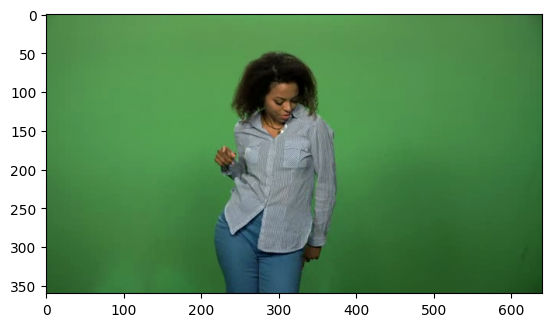

In [2]:
cap = cv.VideoCapture('dance.mp4')
for i in range(176):
    ret, frame = cap.read()

dframe = frame[:,:,::-1]/255
plt.imshow(dframe)
cap.release()

In [3]:
def get_plot(img, col, next_col, c, r):
    back = col[np.newaxis, np.newaxis, :].repeat(img.shape[0], axis=0).repeat(img.shape[1], axis=1)

    for i, row in enumerate(back):
        for j, el in enumerate(row):
            if (i-c[0])**2 + (j-c[1])**2 < r**2:
                back[i, j] = next_col
    return back

In [6]:
def rr(img, a1, b1, p, col, next_col, radius, seed):
    np.random.seed(seed)
    avg = np.sqrt(img[:,:,0]**2 + img[:,:,2]**2)
    x = np.tile((img[:,:,1]-a1*avg-b1)[:, :, np.newaxis], 3)
    r = 1/(1+np.power(p, -x))

    mg = img.shape[0]/4 #margin
    back = get_plot(img, col,
                    next_col, 
                    (mg+np.random.randint(img.shape[0]-2*mg), mg+np.random.randint(img.shape[1]-2*mg)),
                    radius)
                    
    img = r*back + (1-r)*img
    img = np.where(img > 1, 1, img)
    img = np.where(img < 0, 0, img)

    return img

def rr_show(a1, b1, p):
    img = rr(dframe, a1, b1, p, np.array([1.0, 0.0, 0.0]), np.array([0.0, 0.0, 1.0]), 150, seed=1)
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(img)

interact(rr_show, a1=widgets.FloatSlider(min=0.0, max=1.0, step=0.05, value=0.7),
                  b1=widgets.FloatSlider(min=0.0, max=1.0, step=0.025, value=0.1), #0.15
                  p=widgets.FloatLogSlider(min=1, max=30, value=1e20))

interactive(children=(FloatSlider(value=0.7, description='a1', max=1.0, step=0.05), FloatSlider(value=0.1, des…

<function __main__.rr_show(a1, b1, p)>

In [5]:
cap = cv.VideoCapture('dance.mp4')
fourcc = cv.VideoWriter_fourcc(*'MJPG') # MJPG (.mp4), DIVX (.avi), X264 (.mkv)
w, h = int(cap.get(cv.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))
out = cv.VideoWriter('out.avi', fourcc, 25, (w, h))

i = 0
while cap.isOpened():
    if (i//17)%8 == 0:
        i += 17

    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    
    cidx = (i//17)%8
    ncidx = (i//17 + 1)%8
    if ncidx == 0:
        ncidx = 1

    col = np.array(list(map(int, f'{cidx:0>3b}')))
    next_col = np.array(list(map(int, f'{ncidx:0>3b}')))

    frame = frame[:,:,::-1]/255
    frame = rr(frame, 0.7, 0.1, 1e20, col, next_col, i%17*(h/9), i//17)
    frame = np.uint8(frame[:,:,::-1]*255)

    out.write(frame)

    i += 1

cap.release()
out.release()

Can't receive frame (stream end?). Exiting ...
